# Twitter Take-Home

In [254]:
#Importing the libraries 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import time
from IPython.display import display

In [255]:
#Load the dataset and check for null values
data = pd.read_csv('../twitter_data.csv') 
data['datetime'] = pd.to_datetime(data['datetime'],format='%Y-%m-%d %H:%M:%S') #convert column to datetime format
data['pacing'] = data['campaign_spend']/data['campaign_budget'] #define pacing
data.shape[0] - data.dropna().shape[0] #will give 0 if no null values

0

## Campains 1 & 2 comparison

In [ ]:
#Divide dataset into the 2 campaigns
camp1 = data[data['campaign_id']==1]
camp2 = data[data['campaign_id']==2]

In [231]:
camp1.head()

,datetime,campaign_id,campaign_spend,campaign_budget,matched_targeting,objective,charged,seen_by_user,bid,pacing
362,2018-04-23 08:57:08.925000,1,0.000000,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5,0.000000
371,2018-04-23 08:58:28.159720,1,0.012214,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5,0.000024
376,2018-04-23 08:59:18.955240,1,0.012214,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5,0.000024
377,2018-04-23 08:59:23.448840,1,0.012214,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5,0.000024
378,2018-04-23 08:59:32.645960,1,0.000000,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5,0.000000


In [232]:
camp2.head()

,datetime,campaign_id,campaign_spend,campaign_budget,matched_targeting,objective,charged,seen_by_user,bid,pacing
14930,2018-04-23 10:52:40.949,2,85.842301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15,0.024181
15128,2018-04-23 10:53:29.333,2,85.842301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15,0.024181
15338,2018-04-23 10:54:20.200,2,85.842301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15,0.024181
15393,2018-04-23 10:54:34.112,2,86.992301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,True,1.15,0.024505
15458,2018-04-23 10:54:52.198,2,86.992301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15,0.024505


Text(0.5,1,'Campaign 1 Pacing')

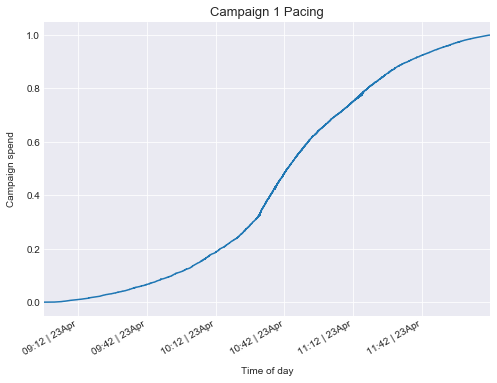

In [233]:
#Plot campaign 1 pacing
sns.set_style("darkgrid")
ax = camp1.plot(x='datetime',y='pacing',figsize=(8,6))
myFmt = mdates.DateFormatter('%H:%M | %d%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Time of day")
ax.set_ylabel("Campaign spend")
ax.legend_.remove()
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_title('Campaign 1 Pacing',fontsize=13)

Text(0.5,1,'Campaign 2 Pacing')

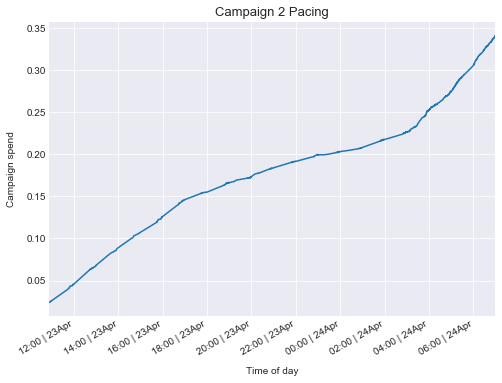

In [234]:
#Plot campaign 2 pacing
sns.set_style("darkgrid")
ax = camp2.plot(x='datetime',y='pacing',figsize=(8,6))
myFmt = mdates.DateFormatter('%H:%M | %d%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Time of day")
ax.set_ylabel("Campaign spend")
ax.legend_.remove()
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_title('Campaign 2 Pacing',fontsize=13)

In [216]:
#Engagement rate = (number of chargeable impressions)/(number of impressions seen)
camp1seen = camp1[camp1['seen_by_user']==True]
camp2seen = camp2[camp2['seen_by_user']==True]
camp1charged = camp1[camp1['charged']>0.0]
camp2charged = camp2[camp2['charged']>0.0]
#Now get the engagement rates for both campaigns

In [217]:
print('Engagement rate campaign 1 : '+str(100*len(camp1charged.index)/len(camp1seen.index))+'%')

Engagement rate campaign 1 : 3.8461538461538463%


In [218]:
print('Engagement rate campaign 2 : '+str(100*len(camp2charged.index)/len(camp2seen.index))+'%')

Engagement rate campaign 2 : 0.6060606060606061%


In [219]:
#Get targeting and bids for both campaigns
camp1.iloc[0][['matched_targeting','bid']]
print('Campaign 1')
print('targeting : '+str(camp1.iloc[0]['matched_targeting']))
print('bid : '+str(camp1.iloc[0]['bid']))

Campaign 1
targeting : GEO
bid : 7.5


In [220]:
camp2.iloc[0][['matched_targeting','bid']]
print('Campaign 2')
print('targeting : '+str(camp2.iloc[0]['matched_targeting']))
print('bid : '+str(camp2.iloc[0]['bid']))

Campaign 2
targeting : ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']
bid : 1.15


## Broader Examination

In [236]:
#What are the campaigns belonging to each objective
appinstall = data[data['objective']=='APP_INSTALLS']
vidview    = data[data['objective']=='VIDEO_VIEWS']
webclick   = data[data['objective']=='WEBSITE_CLICKS']
print('Campaigns and Objectives')
print('App Install :'+str(appinstall['campaign_id'].unique()))
print('Video Views :'+str(vidview['campaign_id'].unique()))
print('Website Clicks :'+str(webclick['campaign_id'].unique()))

Campaigns and Objectives
App Install :[4 3]
Video Views :[7 6 5]
Website Clicks :[1 2]


In [187]:
#Get importing metrics for each objective
ob1 = appinstall[['campaign_id','bid','campaign_budget']].groupby('campaign_id').agg('mean')
ob1.set_value(3,'engagement',100*len(appinstall[(appinstall['charged']>0.0) & (appinstall['campaign_id']==3)].index)/len(appinstall[(appinstall['seen_by_user']==True) & (appinstall['campaign_id']==3)].index))
ob1.set_value(4,'engagement',100*len(appinstall[(appinstall['charged']>0.0) & (appinstall['campaign_id']==4)].index)/len(appinstall[(appinstall['seen_by_user']==True) & (appinstall['campaign_id']==4)].index))
ob1['objective'] = 'App Install'
ob1

,bid,campaign_budget,engagement,objective
campaign_id,,,,
3,1.5,1000.0,2.521008,App Install
4,1.0,1167.0,0.347222,App Install


In [222]:
ob2 = vidview[['campaign_id','bid','campaign_budget']].groupby('campaign_id').agg('mean')
ob2.set_value(5,'engagement',100*len(vidview[(vidview['charged']>0.0) & (vidview['campaign_id']==5)].index)/len(vidview[(vidview['seen_by_user']==True) & (vidview['campaign_id']==5)].index))
ob2.set_value(6,'engagement',100*len(vidview[(vidview['charged']>0.0) & (vidview['campaign_id']==6)].index)/len(vidview[(vidview['seen_by_user']==True) & (vidview['campaign_id']==6)].index))
ob2.set_value(7,'engagement',100*len(vidview[(vidview['charged']>0.0) & (vidview['campaign_id']==7)].index)/len(vidview[(vidview['seen_by_user']==True) & (vidview['campaign_id']==7)].index))
ob2['objective'] = 'Video View'
ob2

,bid,campaign_budget,engagement,objective
campaign_id,,,,
5,0.50,170.00,33.846154,Video View
6,0.05,138.89,21.943574,Video View
7,0.50,1075.00,34.801762,Video View


In [223]:
ob3 = webclick[['objective','campaign_id','bid','campaign_budget']].groupby('campaign_id').agg('mean')
ob3.set_value(1,'engagement',100*len(webclick[(webclick['charged']>0.0) & (webclick['campaign_id']==1)].index)/len(webclick[(webclick['seen_by_user']==True) & (webclick['campaign_id']==1)].index))
ob3.set_value(2,'engagement',100*len(webclick[(webclick['charged']>0.0) & (webclick['campaign_id']==2)].index)/len(webclick[(webclick['seen_by_user']==True) & (webclick['campaign_id']==2)].index))
ob3['objective'] = 'Website Click'
ob3

,bid,campaign_budget,engagement,objective
campaign_id,,,,
1,7.50,500.0,3.846154,Website Click
2,1.15,3550.0,0.606061,Website Click


In [224]:
#Concatenate the three tables above to make plots
frames = [ob1,ob2,ob3]
res = pd.concat(frames)
res.reset_index(inplace=True)

Text(0.5,1,'Campaign Bids by Objective')

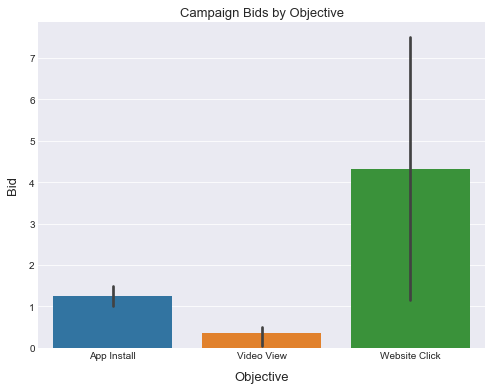

In [256]:
#Campaign Bids
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='objective', y='bid', data=res)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_xlabel('Objective',fontsize=13)
ax.set_ylabel('Bid',fontsize=13)
ax.set_title('Campaign Bids by Objective',fontsize=13)

Text(0.5,1,'Campaign Engagement by Objective')

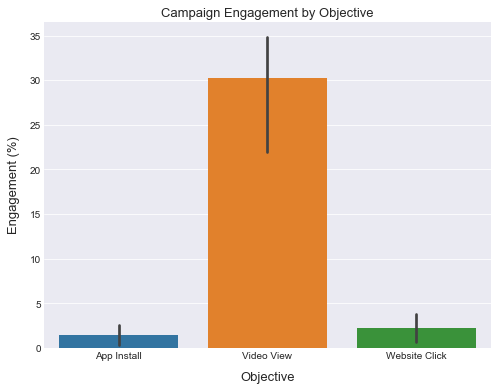

In [257]:
#Engagement Rates
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='objective', y='engagement', data=res)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_xlabel('Objective',fontsize=13)
ax.set_ylabel('Engagement (%)',fontsize=13)
ax.set_title('Campaign Engagement by Objective',fontsize=13)

Text(0.5,1,'Campaign Budget by Objective')

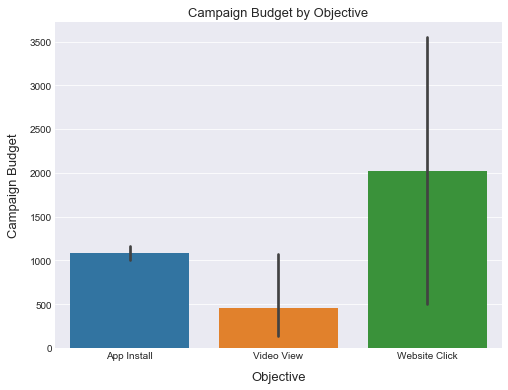

In [258]:
#Campaign Budgets
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='objective', y='campaign_budget', data=res)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_xlabel('Objective',fontsize=13)
ax.set_ylabel('Campaign Budget',fontsize=13)
ax.set_title('Campaign Budget by Objective',fontsize=13)

Text(0.5,1,'App Install Pacing')

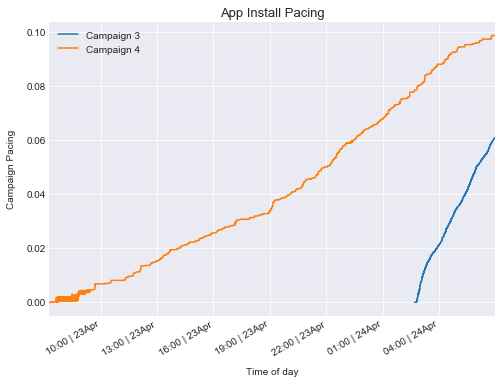

In [239]:
#Pacings for all three objectives
ax = appinstall.loc[appinstall.campaign_id==3].plot(x='datetime',y='pacing',figsize=(8,6),label='Campaign 3')
appinstall.loc[appinstall.campaign_id==4].plot(ax=ax,x='datetime',y='pacing',figsize=(8,6),label='Campaign 4')
myFmt = mdates.DateFormatter('%H:%M | %d%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Time of day")
ax.set_ylabel("Campaign Pacing")
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_title('App Install Pacing',fontsize=13)

Text(0.5,1,'Video Views Pacing')

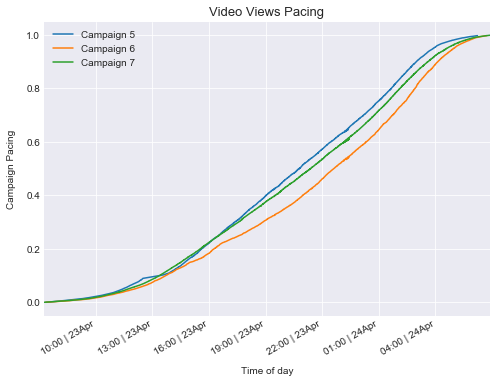

In [240]:
ax = vidview.loc[vidview.campaign_id==5].plot(x='datetime',y='pacing',figsize=(8,6),label='Campaign 5')
vidview.loc[vidview.campaign_id==6].plot(ax=ax,x='datetime',y='pacing',figsize=(8,6),label='Campaign 6')
vidview.loc[vidview.campaign_id==7].plot(ax=ax,x='datetime',y='pacing',figsize=(8,6),label='Campaign 7')
myFmt = mdates.DateFormatter('%H:%M | %d%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Time of day")
ax.set_ylabel("Campaign Pacing")
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_title('Video Views Pacing',fontsize=13)

Text(0.5,1,'Website Click Pacing')

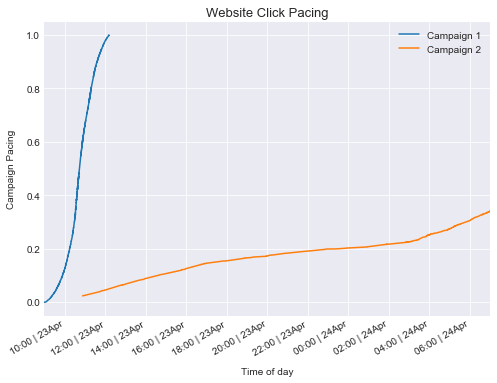

In [241]:
ax = webclick.loc[webclick.campaign_id==1].plot(x='datetime',y='pacing',figsize=(8,6),label='Campaign 1')
webclick.loc[webclick.campaign_id==2].plot(ax=ax,x='datetime',y='pacing',figsize=(8,6),label='Campaign 2')
myFmt = mdates.DateFormatter('%H:%M | %d%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Time of day")
ax.set_ylabel("Campaign Pacing")
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_title('Website Click Pacing',fontsize=13)

In [259]:
#Rate at which users see all three objectives
print('Appinstall seen by user with probability : ' +str(100*len(appinstall[appinstall['seen_by_user']==True].index)/len(appinstall.index))+'%')

Appinstall seen by user with probability : 5.261797026502909%


In [260]:
print('Videoview seen by user with probability : ' +str(100*len(vidview[vidview['seen_by_user']==True].index)/len(vidview.index))+'%')

Videoview seen by user with probability : 21.245180871134444%


In [261]:
print('Websiteclick seen by user with probability : ' +str(100*len(webclick[webclick['seen_by_user']==True].index)/len(webclick.index))+'%')

Websiteclick seen by user with probability : 12.881630250864415%
